In [1]:
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


In [2]:
# Define dimension.
d = 2

rx, ry = np.arange(-5, 5, 0.3), np.arange(-5, 5, 0.3)
gx, gy = np.meshgrid(rx, rx)
X_2D = np.c_[gx.ravel(), gy.ravel()]

X_2D_train = np.random.uniform(-4, 4, (1000, 2))


def f(x, y):
    f = np.sin((4*np.pi)*x) + np.sin((0.1*np.pi)*y)
    return(f)

f_x = f(X_2D_train[:, 0], X_2D_train[:, 1])



In [3]:
# Error standard deviation. 
sigma_n = 0.4
# Errors.
epsilon = np.random.normal(loc=0, scale=sigma_n, size=1000)
# Observed target variable. 
y = f_x + epsilon

In [4]:
with pm.Model() as model:
    sigma1 = pm.HalfCauchy("η1", beta=5)
    sigma2 = pm.HalfCauchy("η2", beta=5)
    ls1 = pm.HalfCauchy('ls1', beta=10)
    ls2 = pm.HalfCauchy('ls2', beta=10)
    cov1 = sigma1 * pm.gp.cov.ExpQuad(2, ls=ls1, active_dims=[0])
    cov2 = sigma2 * pm.gp.cov.ExpQuad(2, ls=ls2, active_dims=[1]) 
    gp1 = pm.gp.Marginal(cov1)
    gp2 = pm.gp.Marginal(cov2)
    gp = gp1 + gp2
    sigma = pm.HalfCauchy("sigma", beta=3)
    f = gp.marginal_likelihood("f", X_2D_train, y, sigma)
    

/home/anurag/pymc3/lib/python3.6/site-packages/theano/tensor/basic.py:6592: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x


In [5]:
with model:
    trace = pm.sample(1000, chains=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/home/anurag/pymc3/lib/python3.6/site-packages/theano/tensor/basic.py:6592: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
/home/anurag/pymc3/lib/python3.6/site-packages/theano/tensor/basic.py:6592: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
/home/anurag/pymc3/lib/python3.6/site-packages/theano/tensor/basic.py:6592: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `ar

/home/anurag/pymc3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/home/anurag/pymc3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/home/anurag/pymc3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/home/anurag/pymc3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternati

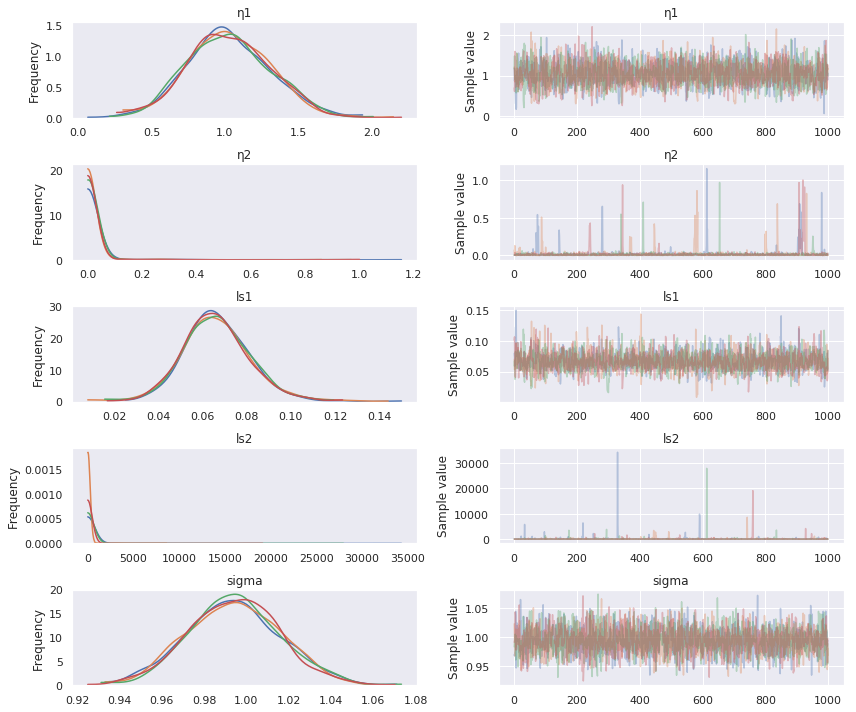

In [6]:
with model:
    pm.traceplot(trace)

In [25]:
trace['sigma'].shape

(4000,)

In [26]:
X_2D_star = np.zeros((1000, 2))
X_2D_star[:, 0] = np.linspace(-4, 4, 1000)
X_2D_star[:, 1] = np.linspace(-4, 4, 1000)

In [27]:
print(X_2D_train.shape)
print(X_2D_star.shape)
print(y.shape)

(1000, 2)
(1000, 2)
(1000,)


In [34]:
 with model:
    # conditional distributions of f1 and f2
    #f1_star = gp1.conditional("f1_star", X_2D_star,
    #                          given={"X": X_2D_train, "y": y, 
    #                                 "noise": sigma, "gp": gp})
    #f2_star = gp2.conditional("f2_star", X_2D_star,
    #                          given={"X": X_2D_train, "y": y, 
    #                                 "noise": sigma, "gp": gp})

    # conditional of f1 + f2, `given` not required
    f_star = gp.conditional("f_star", X_2D_star)

TypeError: For compute_test_value, one input test value does not have the requested type.

The error when converting the test value to that variable type:
Wrong number of dimensions: expected 1, got 2 with shape (1000, 1000).